<a href="https://colab.research.google.com/github/joudelshawa/mental-health-ai-app/blob/main/Twitter_data_using_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import tweepy
import pandas as pd
import numpy as np
import os
import pandas as pd
import nltk
import re
from pprint import pprint

#nltk.download('punkt')
#nltk.download('wordnet')
nltk.download('stopwords')


# Import word_tokenize and stopwords from nltk
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
  !python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180945 sha256=b12c309f3212056ad87cb26f9101f5701f684f5e254dd809eb705a5b52ac0aea
  Stored in directory: /tmp/pip-ephem-wheel-cache-fdt315h_/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
!pip install pyldavis
!pip install chart_studio
!pip install --upgrade autopep8

     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 


In [ ]:
!pip install plotly==4.*

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from wordcloud import STOPWORDS
# spacy for lemmatization
import spacy
from spacy.lang.en import English
spacy.load('en')

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.



In [ ]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [ ]:
#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
#import chart_studio
#import chart_studio.plotly as py 
#import chart_studio.tools as tls

In [ ]:
# Get the necessary API information 
consumer_key = "mdmzMBrRM2nNnTdEoN7jZuxmY"
consumer_key_secret = "3D6YYKcs6kheu1VjqZzkHOu9Fu5RBXKYOG947t0PGykr39btce"
access_token = "525051045-gOq1C7h2YUbz1gFhRuehci0atHZUPwFC5nwlv0VP"
access_token_secret = "eXvSLyGa9OrzS6R1EiZ86nxvHGpP0RsxelqyVWkxZqmYV"

In [ ]:
# Create a hashtags list
hashtags = ["#distancelearning", \
            "#onlineschool",     \
            "#onlineteaching",   \
            "#virtuallearning",  \
            "#onlineducation",   \
            "#distanceeducation",\
            "#OnlineClasses",    \
            "#DigitalLearning",  \
            "#elearning",        \
            "#onlinelearning"]

# Create a search list
search_list = ["distance learning",  \
               "online teaching",    \
               "online education,",  \
               "online course",      \
               "online semester",    \
               "distance course",    \
               "distance education", \
               "online class",       \
               "e-learning",         \
               "e learning"]


# Setup tweepy with Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Define a function to get tweets
def get_tweets(search, is_Hashtag):
    
    # Create a pandas DataFrame
    df_temp = pd.DataFrame(columns = ["Content", "Location", "Username", "Retweet-Count", "Favorites", "Created at"])
    
    # Get the tweets
    tweets = tweepy.Cursor(api.search, q = search + " -filter:retweets", lang="en",since="2020-12-06", tweet_mode='extended').items(100)
    
    # Iterate over tweets
    for tweet in tweets:
        content = tweet.full_text
        username = tweet.user.screen_name
        location = tweet.user.location
        created_at = tweet.created_at
        retweetcount = tweet.retweet_count
        favorites = tweet.favorite_count
        
        # Create a list consists of the features
        retrieved = [content, location, username, retweetcount, favorites, created_at]
        
        # Append list to the DataFrame
        df_temp.loc[len(df_temp)] = retrieved
        
    # Generate unique filename
    path = os.getcwd()
    
    # Generate a filename for hashtags or specific word
    if is_Hashtag:
        filename = path + '/drive/MyDrive/tweeter/' + search[1:] + '_hashtag.csv'
    else:
        filename = path + '/drive/MyDrive/tweeter/' + search.replace(" ", "") + '_wordsearch.csv'
    # Save the csv file
    df_temp.to_csv(filename)


# Call get_tweets function for each hashtag and search word

for hashtag in hashtags:
    get_tweets(hashtag, is_Hashtag=True)

for search in search_list:
    get_tweets(search, is_Hashtag=False)

In [ ]:
# Concatenate the DataFrames and load tweets

# Get csv file names in output directory
path = os.getcwd() + "/drive/MyDrive/tweeter/"
files = os.listdir(path)

# Create a list to store DataFrames
df_list = []

# Iterate over files in output dir and append DataFrames into df_list
for file in files:
    df = pd.read_csv(path + file, index_col=None)
    df_list.append(df)

# Create a DataFrame
tweets_raw = pd.concat(df_list, axis=0, ignore_index=True)

# Save the DataFrame as a csv file
tweets_raw.to_csv("tweets_raw.csv")

# Load the tweets
tweets_raw = pd.read_csv("tweets_raw.csv")
# Display the first five rows
display(tweets_raw.head())
# Print the summary statistics
print(tweets_raw.describe())
# Print the info
print(tweets_raw.info())

,Unnamed: 0,Unnamed: 0.1,Content,Location,Username,Retweet-Count,Favorites,Created at
0,0,0,Learning is about interactions that bring out ...,United States,DrBruceAJohnson,0,0,2021-06-13 15:29:30
1,1,1,🚨5 MINUTE TIP🚨\n \n☑️So You Made a GREAT VIDEO...,NaN,educatoralex,0,0,2021-06-13 15:27:03
2,2,2,Adjuncts with all level of experience can bene...,United States,DrBruceAJohnson,0,0,2021-06-13 14:58:56
3,3,3,Manzil Summer Program 2021\nOnline &amp; Onsit...,Sharjah,friendsofmanzil,1,1,2021-06-13 14:50:02
4,4,4,Taking eCore or eMajor classes?! 👀\n\nDownload...,"Carrollton, GA",USG_eCampus,1,0,2021-06-13 14:25:03


        Unnamed: 0  Unnamed: 0.1  Retweet-Count    Favorites
count  1854.000000   1854.000000    1854.000000  1854.000000
mean    926.500000     48.542611       0.934736     2.506472
std     535.348018     29.055580       7.504670    24.517859
min       0.000000      0.000000       0.000000     0.000000
25%     463.250000     23.000000       0.000000     0.000000
50%     926.500000     48.000000       0.000000     0.000000
75%    1389.750000     74.000000       1.000000     1.000000
max    1853.000000     99.000000     301.000000   827.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1854 non-null   int64 
 1   Unnamed: 0.1   1854 non-null   int64 
 2   Content        1854 non-null   object
 3   Location       1377 non-null   object
 4   Username       1854 non-null   object
 5   Retweet-Count  1854 non-null   int64 
 

In [ ]:

def process_tweets(tweet):
    
    # Remove links
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Remove mentions and hashtag
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Tokenize the words
    #tokenized = word_tokenize(tweet)

    # Remove the stop words
    #tokenized = [token for token in tokenized if token not in stopwords.words('english')] 

    # Lemmatize the words for NLTK
    #lemmatizer = WordNetLemmatizer()
    #tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    #tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    
    return tweet                           
    #return tokenized
    
# Call the function and store the result into a new column
tweets_raw["Processed"] = tweets_raw["Content"].str.lower().apply(process_tweets)

# Print the first fifteen rows of Processed
display(tweets_raw[["Processed"]].head(15))

,Processed
0,learning is about interactions that bring out ...
1,🚨5 minute tip🚨\n \n☑️so you made a great video...
2,adjuncts with all level of experience can bene...
3,manzil summer program 2021\nonline &amp; onsit...
4,taking ecore or emajor classes?! 👀\n\ndownload...
5,bedtime stories are a great way for parents to...
6,join president randi weingarten to 🎉celebrate ...
7,get it now! my weekly newsletter distancelear...
8,do you teach civics in elementaryschool? then ...
9,we have it all! stop by our store and save lik...


In [ ]:
# Convert to list
tweets = tweets_raw["Processed"].values.tolist()
print(tweets[:3])

['learning is about interactions that bring out the best performance in students. new from dr. j   highered onlinelearning onlineteaching distancelearning adjunct adultedu educators positivity kindness linkedin  ', '🚨5 minute tip🚨\n \n☑️so you made a great video\n \n😡but you have no idea how to edit it &amp; make it cool\n \n😘here is a quick free tool!\n \n👉\n \ngoogleei miee geg mieexpert globalgeg iste tcea fetc cue education classroom distancelearning ', "adjuncts with all level of experience can benefit from dr. j's experience:  onlineteaching distancelearning adjuncts educators adultedu elearning edtech onlinelearning highered highereducation professionaldevelopment via  "]


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

tweets_words = list(sent_to_words(tweets))

print(tweets_words[:1])

[['learning', 'is', 'about', 'interactions', 'that', 'bring', 'out', 'the', 'best', 'performance', 'in', 'students', 'new', 'from', 'dr', 'highered', 'onlinelearning', 'onlineteaching', 'adjunct', 'adultedu', 'educators', 'positivity', 'kindness', 'linkedin']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(tweets_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[tweets_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[tweets_words[2]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



['adjuncts', 'with', 'all', 'level', 'of', 'experience', 'can', 'benefit', 'from', 'dr', 'experience', 'onlineteaching_adjuncts_educators', 'adultedu', 'elearning', 'edtech', 'onlinelearning', 'highered_highereducation_via']


In [ ]:
stopwords = set(STOPWORDS)

# Custom stopwords
custom_stopwords = ['hi','\n','\n\n', '&amp;', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@']

# Customize stop words by adding to the default list

nlp = English()
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)
# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
  # doc_list = []
  # for doc in texts:
  #   print('This are docs',doc)
  #   word_list = []
  #   for word in texts:
  #     if word not in ALL_STOP_WORDS:
  #       word_list.append(word)
  #     #doc_list.append(word_list)
  # return word_list 
   return [[word for word in simple_preprocess(str(doc)) if word not in ALL_STOP_WORDS] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
tweets_words_nostops = remove_stopwords(tweets_words)
print(tweets_words_nostops)
# Form Bigrams
tweets_words_bigrams = make_bigrams(tweets_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
tweets_lemmatized = lemmatization(tweets_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(tweets_lemmatized[:1])

[['learning', 'interactions', 'bring', 'best', 'performance', 'students', 'new', 'dr', 'highered', 'onlinelearning', 'onlineteaching', 'adjunct', 'adultedu', 'educators', 'positivity', 'kindness', 'linkedin'], ['minute', 'tip', 'great', 'video', 'idea', 'edit', 'amp', 'cool', 'quick', 'free', 'tool', 'googleei', 'miee', 'geg', 'mieexpert', 'globalgeg', 'iste', 'tcea', 'fetc', 'cue', 'education', 'classroom'], ['adjuncts', 'level', 'experience', 'benefit', 'dr', 'experience', 'onlineteaching', 'adjuncts', 'educators', 'adultedu', 'elearning', 'edtech', 'onlinelearning', 'highered', 'highereducation'], ['manzil', 'summer', 'program', 'online', 'amp', 'onsite', 'open', 'mainstream', 'students', 'disabilities', 'autism', 'dyslexia', 'downsyndrome', 'manzilcenter', 'admissionsopen', 'specialneeds', 'summercamp', 'therapy', 'signlanguage', 'bestbuddies', 'peerteaching'], ['taking', 'ecore', 'emajor', 'classes', 'download', 'pulse', 'app', 'apple', 'android', 'devices', 'stay', 'connected', '

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(tweets_lemmatized)

# Create Corpus
tweets = tweets_lemmatized

# Term Document Frequency
corpus_tweets = [id2word.doc2bow(tweet) for tweet in tweets]

# View
print(corpus_tweets[:])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1)], [(8, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)], [(45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)], [(17, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1)], [(55, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)], [(78, 1), (79, 1), (80, 1), (81, 1)], [(75, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1)], [(75, 1), (90, 1), (91, 1), (92, 1), (93, 1)], [(10, 2), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1)], [(35

In [ ]:
id2word[100]

'positive'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus_tweets[:10]]

[[('bring', 1),
  ('good', 1),
  ('interaction', 1),
  ('kindness', 1),
  ('learn', 1),
  ('linkedin', 1),
  ('new', 1),
  ('performance', 1),
  ('student', 1)],
 [('amp', 1),
  ('classroom', 1),
  ('cool', 1),
  ('cue', 1),
  ('edit', 1),
  ('education', 1),
  ('free', 1),
  ('googleei', 1),
  ('great', 1),
  ('idea', 1),
  ('minute', 1),
  ('quick', 1),
  ('tool', 1),
  ('video', 1)],
 [('adjunct', 1),
  ('adultedu', 1),
  ('benefit', 1),
  ('elearne', 1),
  ('experience', 2),
  ('level', 1),
  ('onlinelearning', 1),
  ('onlineteaching', 1)],
 [('student', 1),
  ('autism', 1),
  ('bestbuddie', 1),
  ('disabilitie', 1),
  ('mainstream', 1),
  ('online', 1),
  ('onsite', 1),
  ('open', 1),
  ('peerteache', 1),
  ('program', 1),
  ('signlanguage', 1),
  ('specialneeds', 1),
  ('summer', 1),
  ('summercamp', 1),
  ('therapy', 1)],
 [('class', 2),
  ('connected', 1),
  ('device', 1),
  ('ecore', 1),
  ('goview', 1),
  ('stay', 1),
  ('take', 1)],
 [('great', 1),
  ('bed', 1),
  ('bedtime'

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_tweets,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=150,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=5,
                                           alpha='auto',
                                           iterations=2000,
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_tweets]

[(0,
  '0.030*"online" + 0.024*"class" + 0.020*"help" + 0.018*"pay" + '
  '0.017*"history" + 0.017*"assignment" + 0.015*"write" + 0.014*"psychology" + '
  '0.013*"learn" + 0.013*"biology"'),
 (1,
  '0.058*"course" + 0.037*"distance" + 0.026*"online" + 0.018*"education" + '
  '0.014*"learn" + 0.012*"alert" + 0.012*"cumulative" + 0.012*"adsb" + '
  '0.009*"year" + 0.008*"start"'),
 (2,
  '0.052*"online" + 0.042*"pay" + 0.024*"education" + 0.021*"class" + '
  '0.017*"semester" + 0.014*"distance" + 0.011*"learning" + 0.010*"course" + '
  '0.009*"homework" + 0.009*"teaching"'),
 (3,
  '0.042*"learn" + 0.017*"free" + 0.013*"course" + 0.013*"distance" + '
  '0.009*"online" + 0.009*"use" + 0.008*"education" + 0.008*"amp" + '
  '0.008*"open" + 0.008*"join"'),
 (4,
  '0.038*"learn" + 0.033*"online" + 0.027*"video" + 0.019*"brand_new" + '
  '0.019*"myth_love" + 0.017*"education" + 0.015*"elearne" + 0.007*"issue" + '
  '0.007*"virtual" + 0.007*"onlinelearning"'),
 (5,
  '0.035*"student" + 0.028*"o

In [ ]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = lda_model.log_perplexity(corpus_tweets)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=tweets_lemmatized, 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n


Perplexity:  -7.4143367257956605

Coherence Score:  0.3650338224794467


In [ ]:

model_5_2 = LdaMulticore(corpus=corpus_tweets,
                       id2word=id2word,
                       num_topics=20,
                       random_state=150,
                       chunksize=2000,
                       passes=10,
                       decay=0.5,
                       alpha=0.01,
                       iterations=2000)

In [ ]:

pprint(model_5_2.print_topics())
doc_lda = model_5_2[corpus_tweets]

[(0,
  '0.021*"onlineclasse" + 0.015*"online" + 0.014*"distance" + 0.012*"mastery" '
  '+ 0.011*"education" + 0.011*"today" + 0.010*"learn" + 0.009*"kid" + '
  '0.009*"relationship" + 0.009*"digitallearne"'),
 (1,
  '0.032*"education" + 0.030*"distance" + 0.023*"course" + 0.015*"learn" + '
  '0.013*"online" + 0.011*"class" + 0.009*"elearne" + 0.009*"parent" + '
  '0.009*"start" + 0.009*"experience"'),
 (2,
  '0.030*"online" + 0.028*"education" + 0.020*"distance" + 0.013*"teacher" + '
  '0.012*"course" + 0.012*"learn" + 0.010*"learning" + 0.010*"admission" + '
  '0.010*"elearne" + 0.009*"new"'),
 (3,
  '0.028*"learn" + 0.013*"education" + 0.011*"learning" + 0.011*"school" + '
  '0.009*"distance" + 0.009*"course" + 0.008*"online" + 0.006*"free" + '
  '0.006*"teach" + 0.006*"person"'),
 (4,
  '0.020*"learn" + 0.016*"education" + 0.015*"digitallearne" + 0.014*"elearne" '
  '+ 0.013*"online" + 0.010*"idea" + 0.010*"classroom" + 0.010*"edtech" + '
  '0.009*"student" + 0.009*"view"'),
 (5,
  

In [ ]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = model_5_2.log_perplexity(corpus_tweets)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=model_5_2, texts=tweets_lemmatized, 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -7.455801937252848

Coherence Score:  0.31634932681008654


In [ ]:
!pip install --upgrade pandas

  Using cached https://files.pythonhosted.org/packages/51/51/48f3fc47c4e2144da2806dfb6629c4dd1fa3d5a143f9652b141e979a8ca9/pandas-1.2.4-cp37-cp37m-manylinux1_x86_64.whl
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
  Found existing installation: pandas 1.2.0
    Uninstalling pandas-1.2.0:
      Successfully uninstalled pandas-1.2.0


In [ ]:
!pip install --upgrade pandas==1.2

     |████████████████████████████████| 9.9MB 30.0MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.0 which is incompatible.
  Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4


In [ ]:
!cat /usr/local/lib/python3.7/dist-packages/pandas/core/computation/check.py

from pandas.compat._optional import import_optional_dependency

ne = import_optional_dependency("numexpr", raise_on_missing=False, on_version="warn")
NUMEXPR_INSTALLED = ne is not None
if NUMEXPR_INSTALLED:
    NUMEXPR_VERSION = ne.__version__
else:
    NUMEXPR_VERSION = None

__all__ = ["NUMEXPR_INSTALLED", "NUMEXPR_VERSION"]


In [ ]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
gensim_models.prepare(model_5_2, corpus_tweets, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10    -0.366587 -0.004303       1        1  8.433362
11     0.019216 -0.098834       2        1  8.333170
7     -0.045082 -0.095502       3        1  8.031674
18     0.012008 -0.085915       4        1  7.084259
5     -0.017296 -0.088573       5        1  6.779434
1      0.032737  0.000184       6        1  5.608082
2      0.035350 -0.049683       7        1  5.542963
9      0.058269  0.020315       8        1  4.741004
6      0.027424 -0.037910       9        1  4.734625
17     0.035466 -0.006178      10        1  4.695168
13     0.070101 -0.012441      11        1  4.669943
19    -0.068608  0.140542      12        1  4.348320
8      0.007258  0.000201      13        1  4.214912
15     0.012406 -0.024326      14        1  4.046212
0      0.026390  0.070912      15        1  3.363429
12    -0.024917  0.092112      16        1  3.358316
16     0.042161  0.010364      17        1  3.201393
4      0.042168  0.039666      18        1  3.029209
3      0.067373  0.061744      19        1  2.945819
14     0.034163  0.067625      20        1  2.838705, topic_info=                 Term        Freq       Total Category  logprob  loglift
552               pay  208.000000  208.000000  Default  30.0000  30.0000
1943            essay   73.000000   73.000000  Default  29.0000  29.0000
1942       assignment   72.000000   72.000000  Default  28.0000  28.0000
287              exam  114.000000  114.000000  Default  27.0000  27.0000
1055            paper   64.000000   64.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
79       remotelearne    3.086771   41.033352  Topic20  -5.2559   0.9746
35             online    4.959696  599.515937  Topic20  -4.7817  -1.2330
1                good    2.881024   71.129979  Topic20  -5.3249   0.3555
95             edtech    2.722438   53.287027  Topic20  -5.3815   0.5877
327   virtuallearning    2.510137   55.917970  Topic20  -5.4627   0.4583

[1351 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1332     18  0.623962       abroad
663       4  0.174042     academic
663       5  0.116028     academic
663       7  0.058014     academic
663       9  0.058014     academic
...     ...       ...          ...
1067      6  0.244192         yoga
1067      9  0.244192         yoga
1067     16  0.488384         yoga
2016      6  0.309435  zoommeeting
2016     15  0.618869  zoommeeting

[3252 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 12, 8, 19, 6, 2, 3, 10, 7, 18, 14, 20, 9, 16, 1, 13, 17, 5, 4, 15])

In [ ]:
#Defining a function to loop over number of topics to be used to find an 
#optimal number of tipics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

In [ ]:
# Can take a long time to run.
model_list_topic, coherence_values_topic = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus_tweets,
                                                        texts=tweets_lemmatized,
                                                        start=2, limit=200, step=6)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n

In [ ]:
print(coherence_values_topic[20])

0.3873155265575438


In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus_tweets, texts=tweets):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tweets, texts=tweets_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.9530,"student, online, exam, class, distance, learn,...","[learn, interaction, bring, good, performance,..."
1,1,4.0,0.9676,"learn, online, video, brand_new, myth_love, ed...","[minute, great, video, idea, edit, amp, cool, ..."
2,2,5.0,0.9530,"student, online, exam, class, distance, learn,...","[adjunct, level, experience, benefit, experien..."
3,3,3.0,0.9686,"learn, free, course, distance, online, use, ed...","[summer, program, online, onsite, open, mainst..."
4,4,5.0,0.9475,"student, online, exam, class, distance, learn,...","[take, ecore, class, device, stay, connected, ..."
5,5,5.0,0.9782,"student, online, exam, class, distance, learn,...","[bedtime, story, great, way, parent, bond, chi..."
6,6,1.0,0.6148,"course, distance, online, education, learn, al...","[join, challenge, overcome, year, register, te..."
7,7,0.0,0.6679,"online, class, help, pay, history, assignment,...","[weekly, newsletter, remotelearne, webinar]"
8,8,3.0,0.9490,"learn, free, course, distance, online, use, ed...","[teach, civic, check, lesson, plan, governance..."
9,9,1.0,0.9158,"course, distance, online, education, learn, al...","[stop, store, teach, homeschooling, homeschool..."


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9792,"online, class, help, pay, history, assignment, write, psychology, learn, biology","[need, academic, help, history, pay, physics, essayhelp, english, essaypay, math, essaydue, hist..."
1,1.0,0.9801,"course, distance, online, education, learn, alert, cumulative, adsb, year, start","[high, cpr, elearne, program, effective, way, introduce, student, r, cpr, risk, recognize, react..."
2,2.0,0.9819,"online, pay, education, class, semester, distance, learning, course, homework, teaching","[pay, homework, help, english, paper, math, essaypay, assignmentpay, assignment, homework, homew..."
3,3.0,0.9793,"learn, free, course, distance, online, use, education, amp, open, join","[online, store, sell, digital, product, take, roughly, set, sell, digital, item, try, free, day,..."
4,4.0,0.9800,"learn, online, video, brand_new, myth_love, education, elearne, issue, virtual, onlinelearning","[love, keep, go, thank, amazing, learner, world, encourage, ahead, effort, provide, world, class..."
5,5.0,0.9824,"student, online, exam, class, distance, learn, school, course, time, learning","[consider, career, teach, rochdale, training, offer, free, online, course, level, support, work,..."


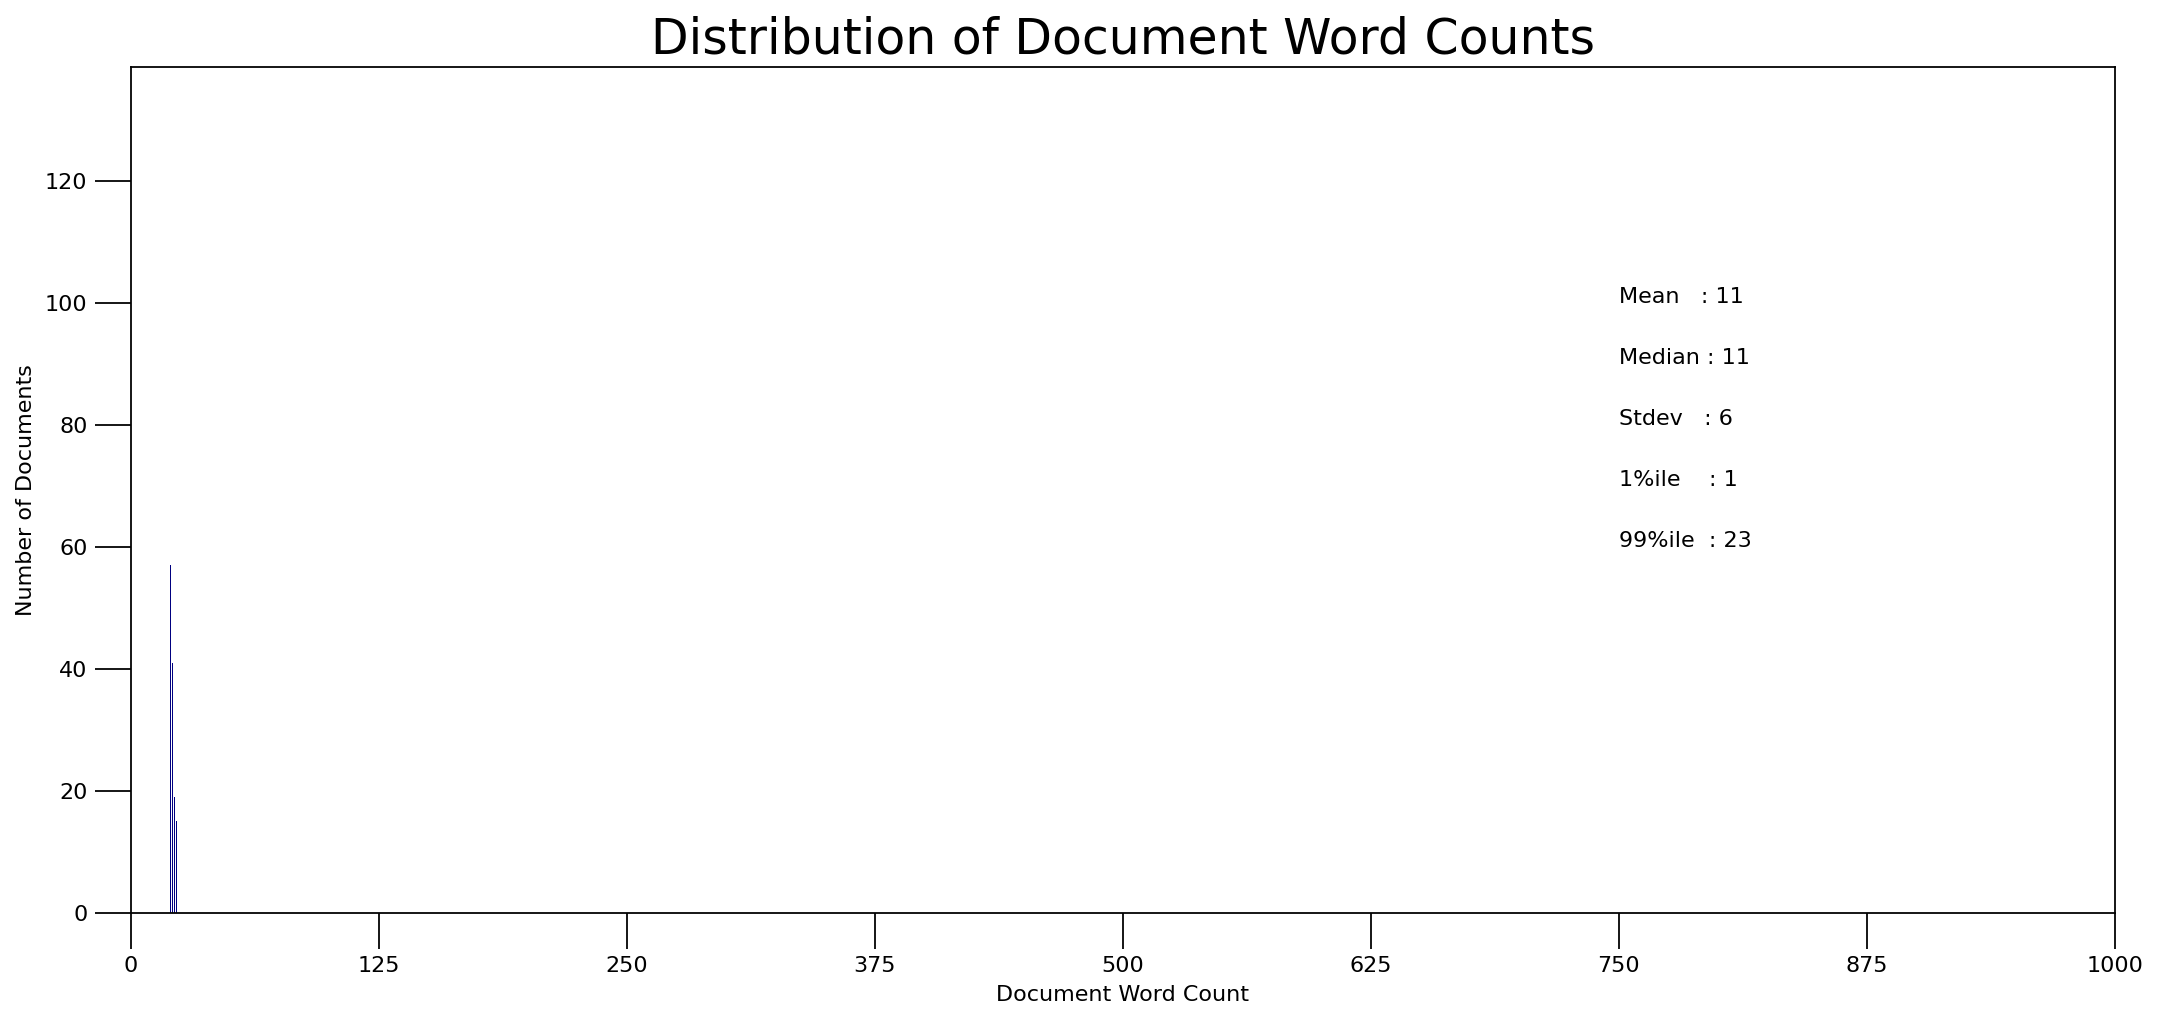

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

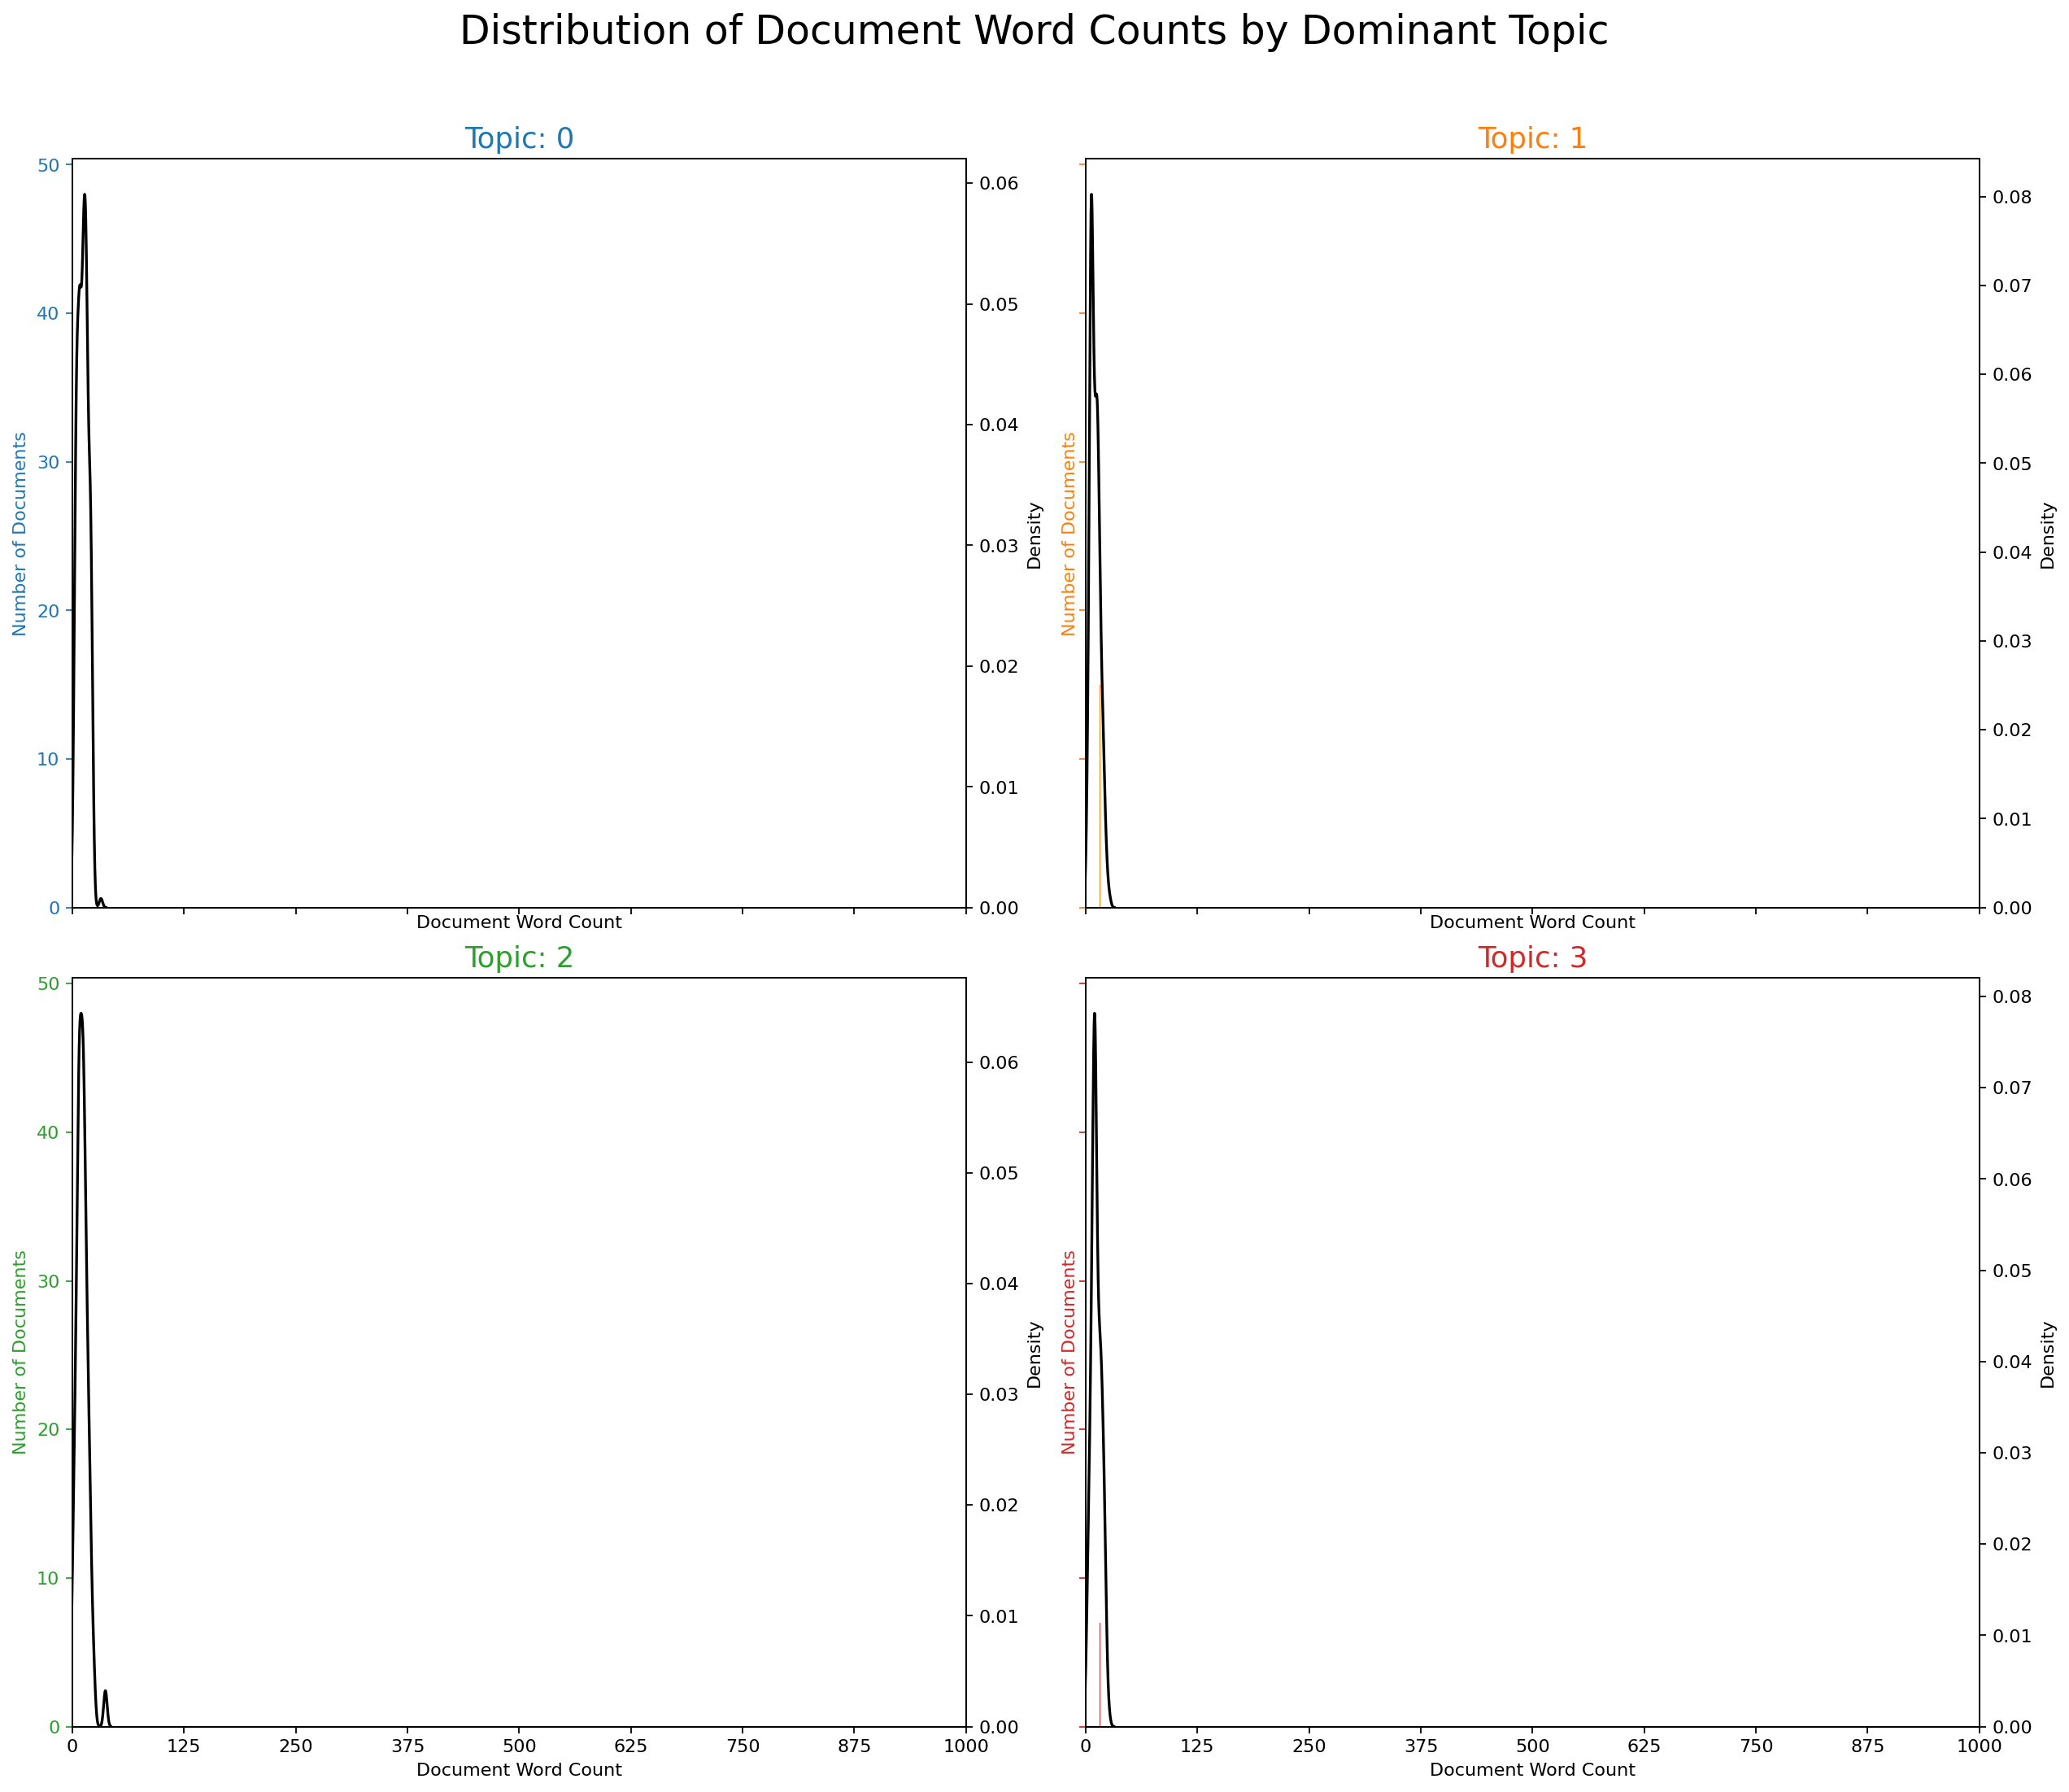

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()


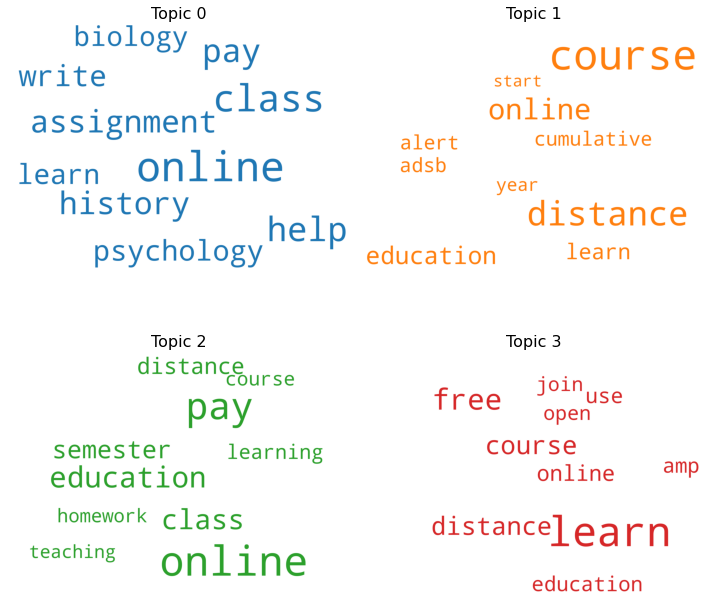

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOP_WORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

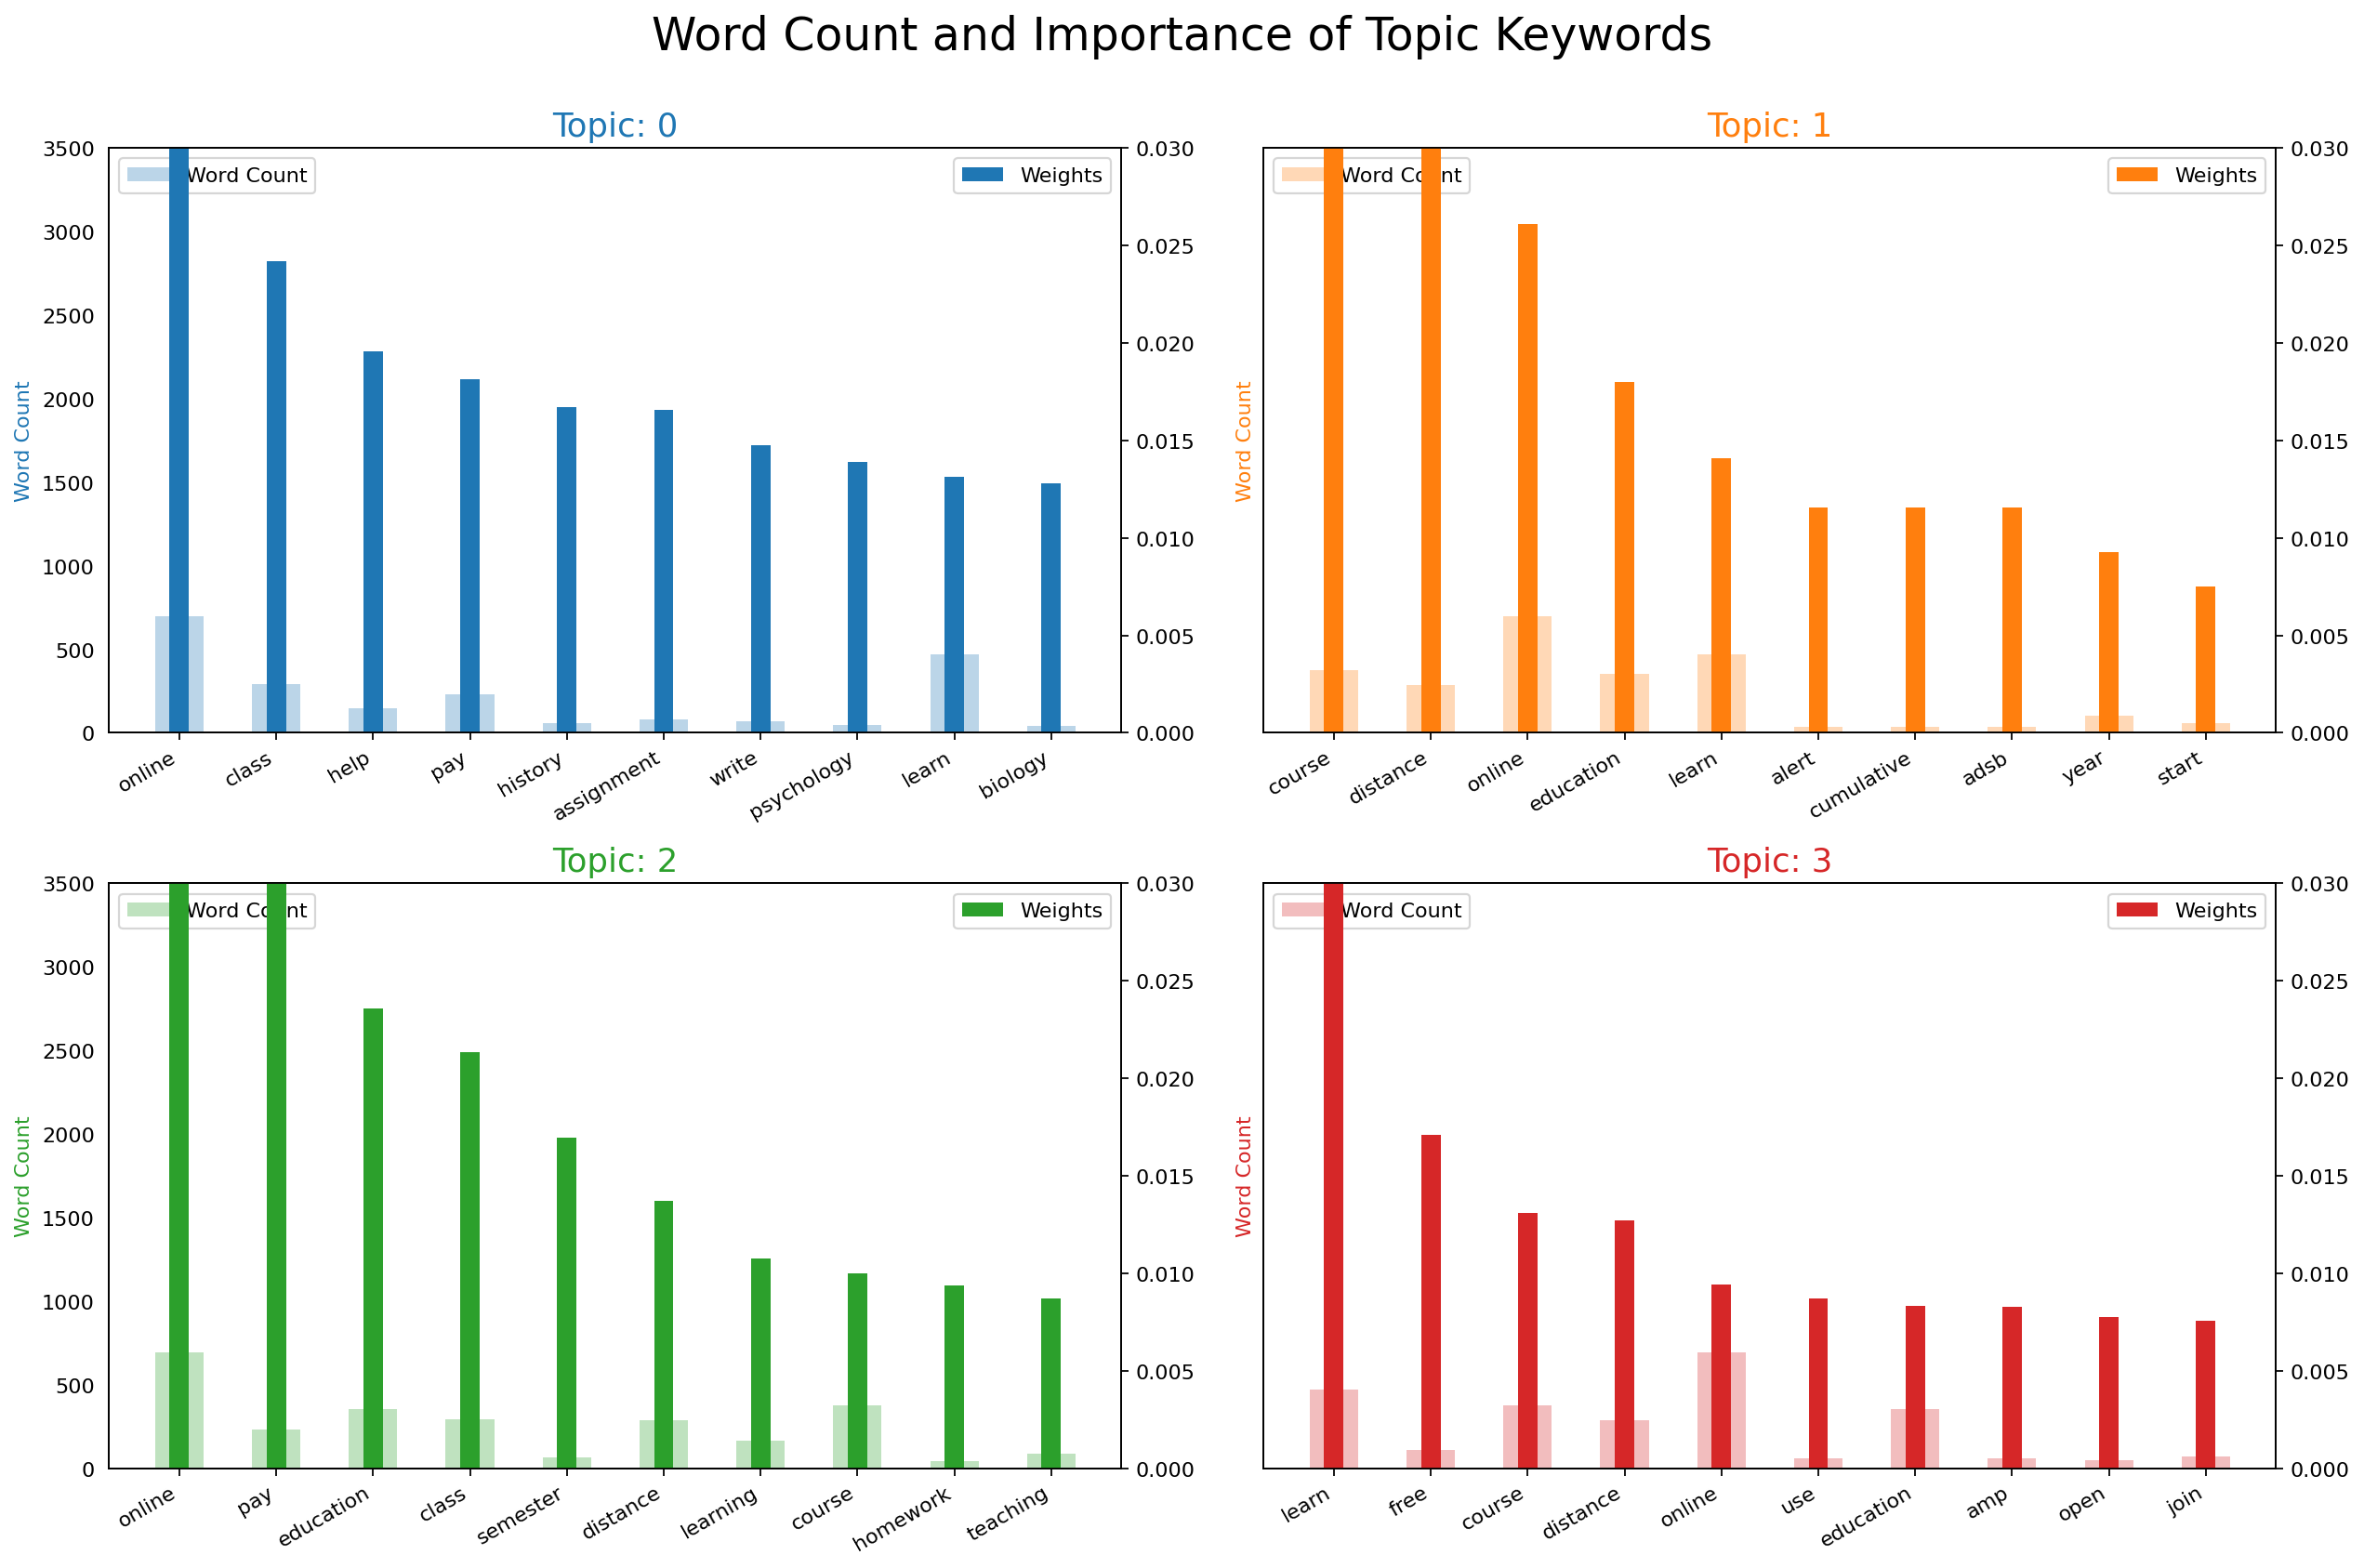

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in tweets_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

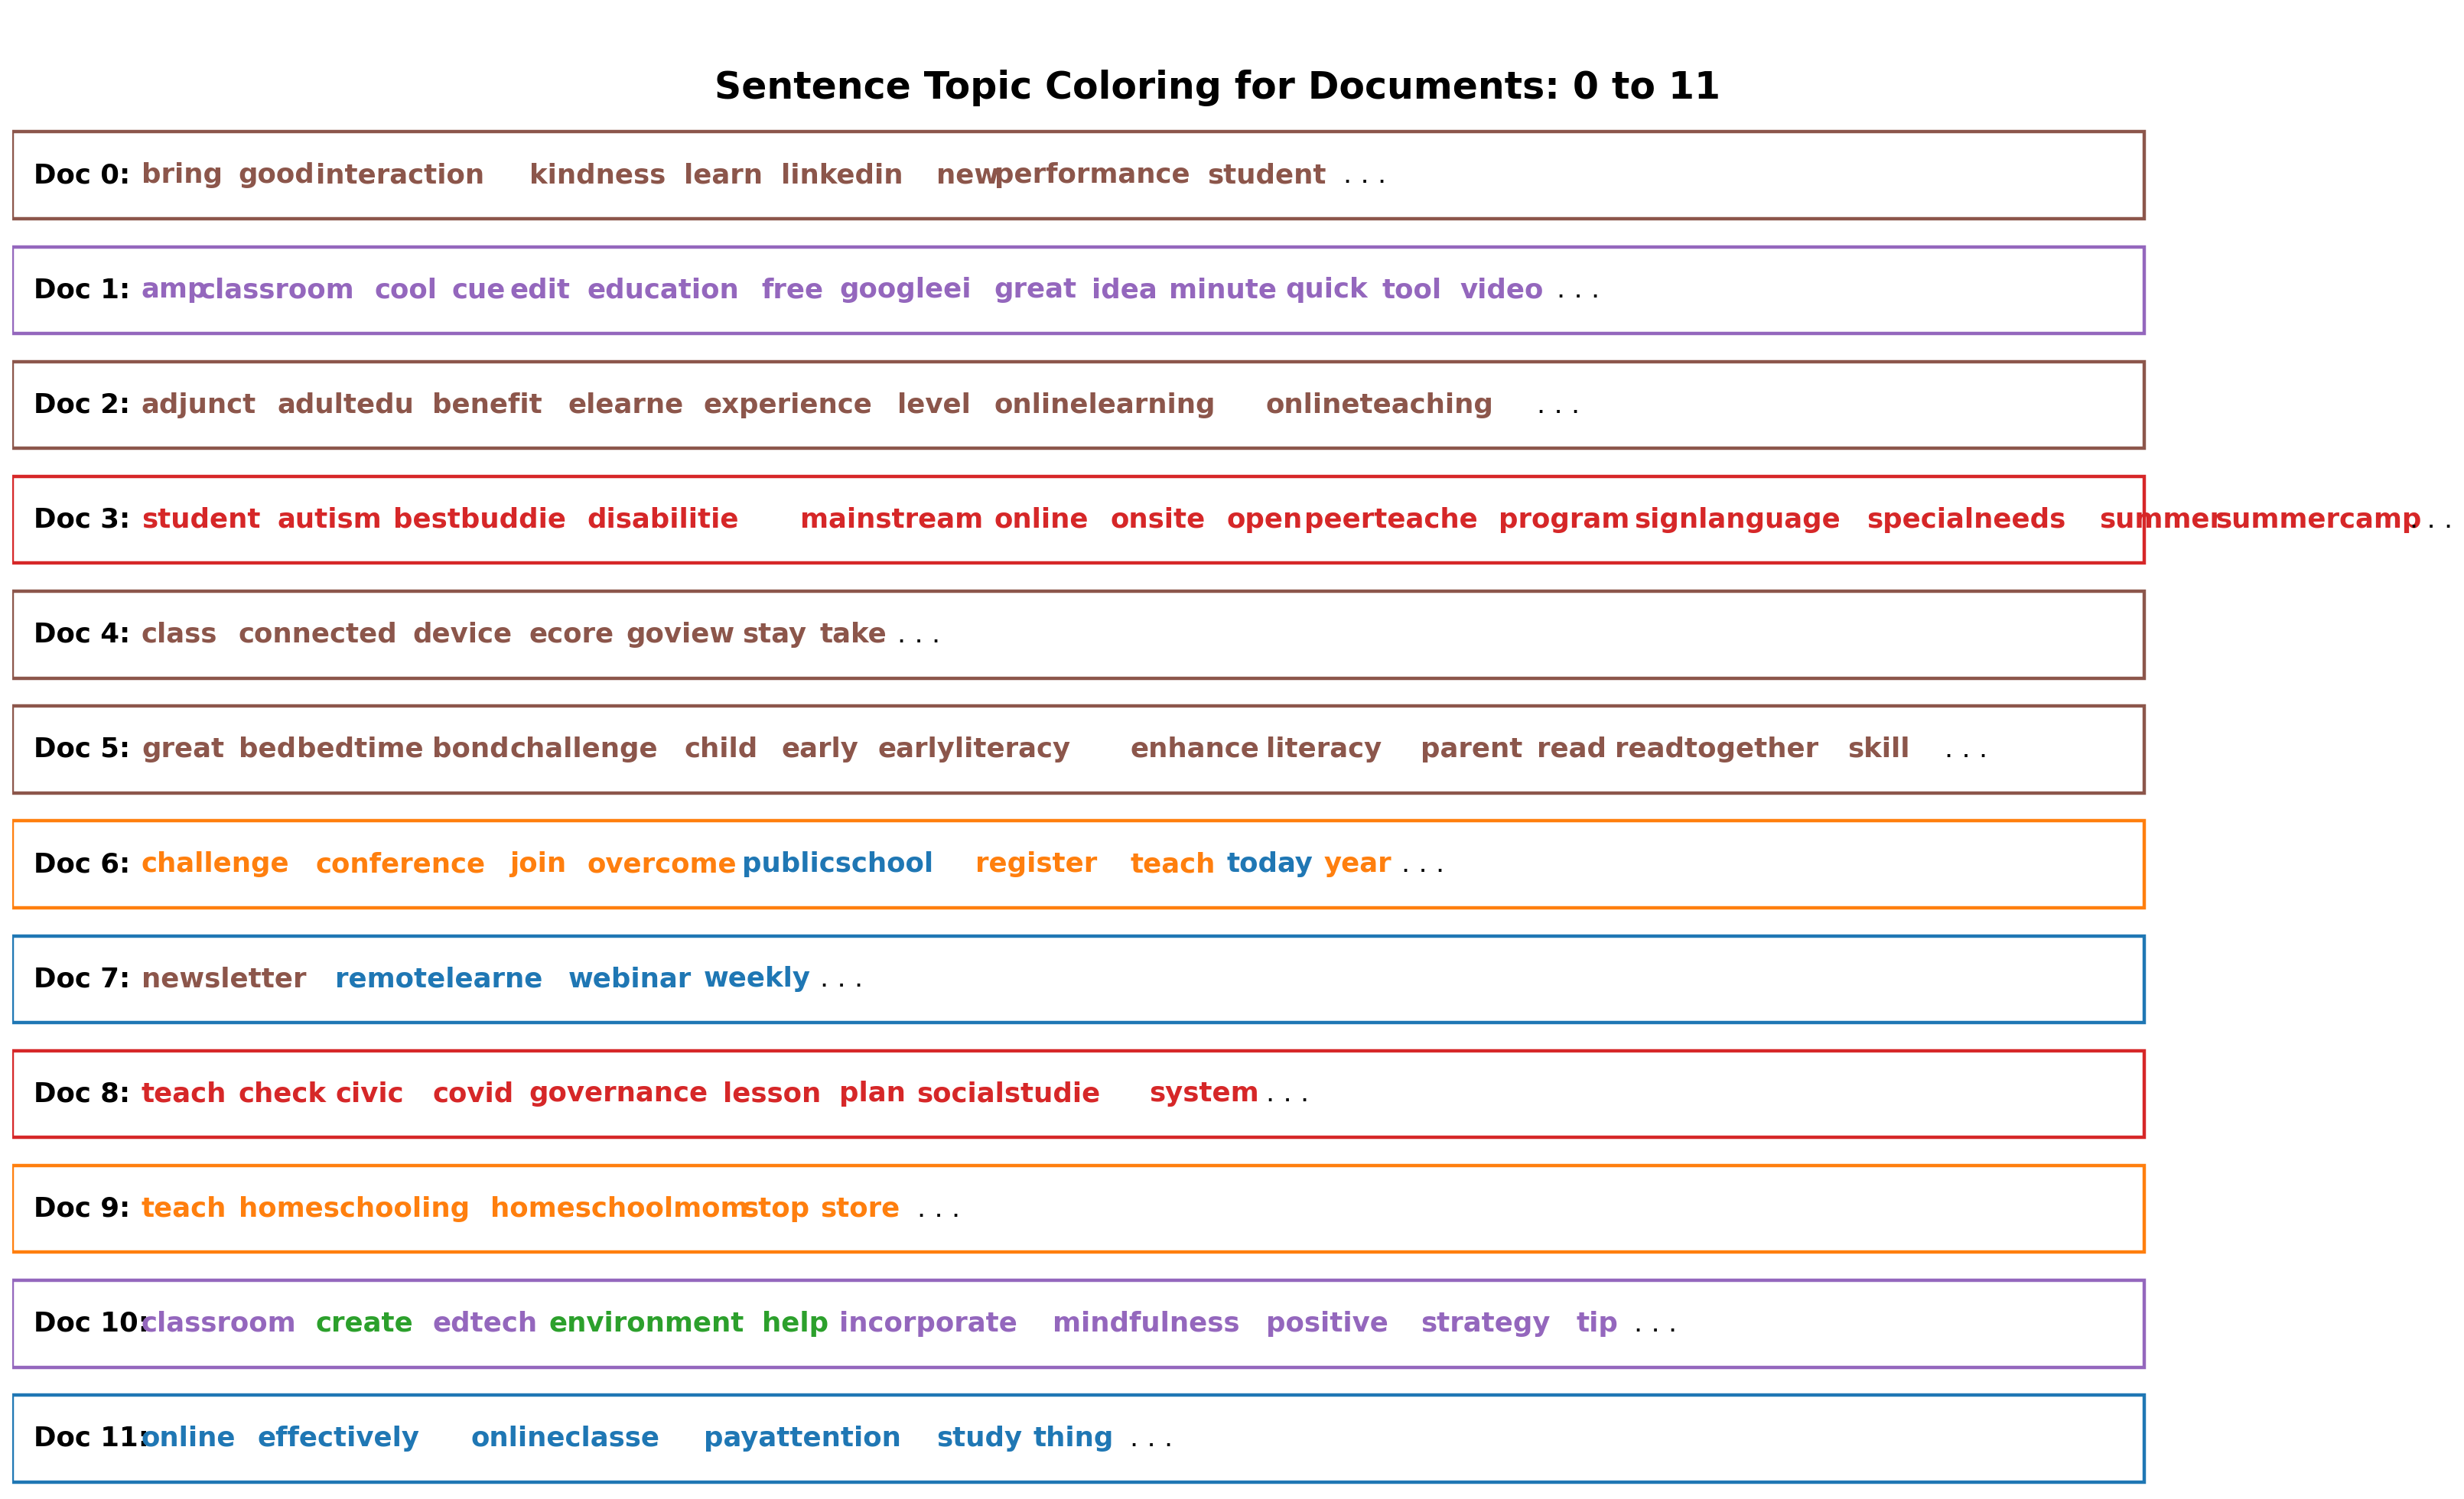

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus_tweets, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()   

In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model=lda_model, corpus=corpus_tweets, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus_tweets, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

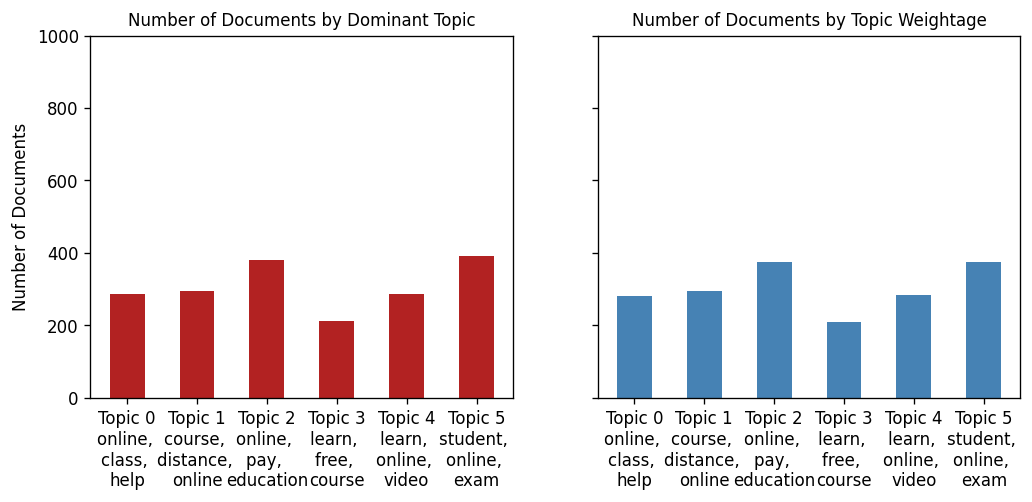

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus_tweets]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1838 samples in 0.004s...
[t-SNE] Computed neighbors for 1838 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1838
[t-SNE] Computed conditional probabilities for sample 1838 / 1838
[t-SNE] Mean sigma: 0.000002
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.223793
[t-SNE] KL divergence after 1000 iterations: 0.261422
